In [ ]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.linear_model import LinearRegression


In [ ]:
# Data Reading

nom_weight = 100
tol_weight = 5
lie_weight = nom_weight - tol_weight
lse_weight = nom_weight + tol_weight
values_weight = np.linspace(lie_weight, lse_weight, 100)

nom_thickness = 5
tol_thickness = 0.1
lie_thickness = nom_thickness - tol_thickness
lse_thickness = nom_thickness + tol_thickness
values_thickness = np.linspace(lie_thickness, lse_thickness, 100)

df = pd.read_excel("Dados.xlsx")
df = df.sort_values(by="Densidade")
print(df)


     Densidade    Peso  Espessura
0          395  125.30       2.13
34         395  121.37       1.98
35         395  122.31       2.01
36         395  123.72       2.09
37         395  121.74       2.08
..         ...     ...        ...
82         404  121.73       2.03
83         404  121.85       2.07
84         404  123.83       2.06
74         404  123.74       2.14
112        404  121.90       2.05

[113 rows x 3 columns]


R2 Score for 395: 0.24158613319065125
R2 Score for 404: 0.15655723930724763


Text(0, 0.5, 'Espessura (mm)')

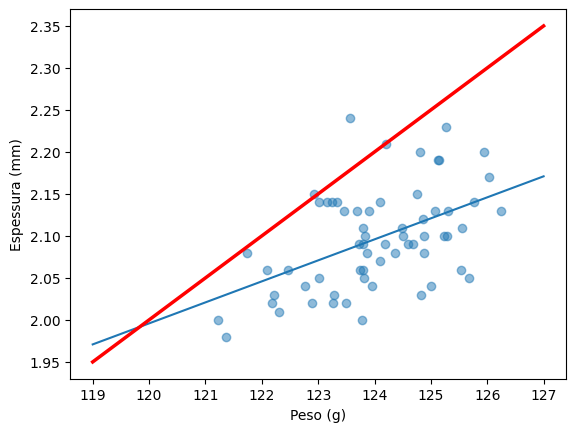

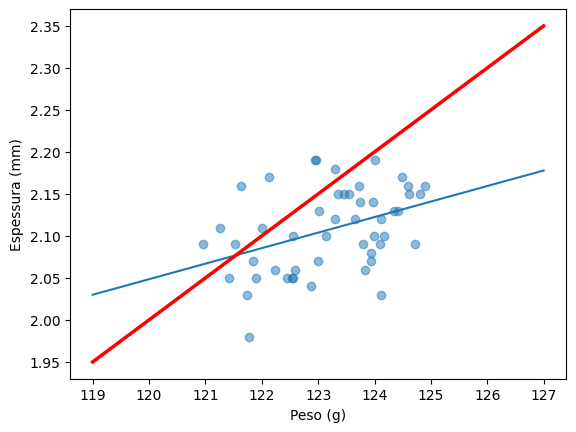

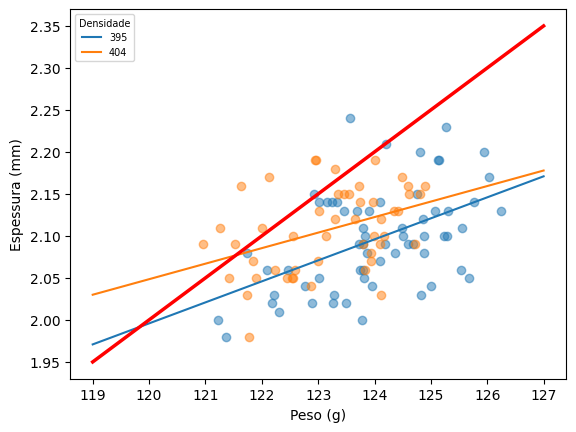

In [ ]:
# Regression

densities = df["Densidade"].unique()
measurements = np.empty((len(densities), 1))

list_of_colors = []

plt.figure(1)

idx = 2
for density in densities:
    # Extract Values
    values = df[df["Densidade"] == density]
    values = values[["Peso", "Espessura"]].values

    # Create Model
    reg = LinearRegression().fit(values[:,0].reshape(-1,1), values[:,1])
    pred_thickness = reg.predict(values_weight.reshape(-1,1))
    r2_score = reg.score(values[:,0].reshape(-1,1), values[:,1])
    print(f"R2 Score for {density}: {r2_score}")

    # Plot Data
    plt.figure(1)
    plt.scatter(values[:,0], values[:,1], alpha=0.5)
    plt.plot(values_weight, pred_thickness, label=f"{density}")

    plt.figure(idx)
    plt.scatter(values[:,0], values[:,1], alpha=0.5)
    plt.plot(values_weight, pred_thickness, label=f"{density}")
    plt.plot(values_weight, values_thickness, "r", linewidth=2.5)
    plt.xlabel("Peso (g)")
    plt.ylabel("Espessura (mm)")

    idx += 1

plt.figure(1)
plt.plot(values_weight, values_thickness, "r", linewidth=2.5)
plt.legend(title="Densidade", loc="upper left", fontsize="x-small", title_fontsize="x-small")
plt.xlabel("Peso (g)")
plt.ylabel("Espessura (mm)")
